# Smart Budget Recommender — **Data Understanding & Preprocessing** (Google Colab)
Dataset: **Family Income and Expenditure** (Filipino Household Survey, Kaggle)

Berikut langkah-langkah yang dilakukan dalam proses pembuatan machine learning berikut:  
1) Memahami struktur data (**kolom, tipe, missing, duplikat, outlier**).  
2) Melakukan **cleaning & wrangling** (membersihkan dataset).  
3) Melakukan **preprocessing** (rename, capping outlier).  
4) Melakukan **EDA bermakna** yang relevan untuk **budgeting bulanan**.


In [1]:
!pip install pandas numpy matplotlib scikit-learn

## 1) Import Library & Konfigurasi
Kami hanya menggunakan `pandas`, `numpy`, `matplotlib`, dan beberapa library `sklearn` untuk analisis & pre-processing.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor

pd.set_option("display.max_columns", 120)
pd.set_option("display.width", 160)

## 2) Load Dataset
- Gunakan nama file yang sudah disepakati: **`Family Income and Expenditure.csv`**.
- Tujuan sel ini: memastikan file terbaca, melihat **shape** serta preview beberapa baris.


In [17]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Capstone_dicoding/Family Income and Expenditure.csv')
print('Shape:', df.shape)
df.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shape: (41544, 60)


,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,Household Head Sex,Household Head Age,Household Head Marital Status,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Household Head Occupation,Household Head Class of Worker,Type of Household,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,Type of Building/House,Type of Roof,Type of Walls,House Floor Area,House Age,Number of bedrooms,Tenure Status,Toilet Facilities,Electricity,Main Source of Water Supply,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,30000,3457,4776,2880,36200,34056,7200,19370,44370,Female,49,Single,Teacher Training and Education Sciences Programs,With Job/Business,General elementary education teaching professi...,Worked for government/government corporation,Extended Family,4,0,1,1,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,80,75,3,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,0,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,27000,3520,12900,5700,29300,9150,1500,0,0,Male,40,Married,Transport Services Programs,With Job/Business,Transport conductors,Worked for private establishment,Single Family,3,0,1,2,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,42,15,2,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,1,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,7200,70,324,420,425,6450,500,0,0,Male,39,Married,Grade 3,With Job/Business,Farmhands and laborers,Worked for private establishment,Single Family,6,0,4,3,Single house,"Light material (cogon,nipa,anahaw)",Light,35,12,1,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, shared with o...",0,"Shared, faucet, community water system",0,0,0,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,6600,60,6840,660,300,3762,500,15580,15580,Male,52,Married,Elementary Graduate,With Job/Business,Rice farmers,Employer in own family-operated farm or business,Single Family,3,0,3,2,Single house,"Light material (cogon,nipa,anahaw)",Light,30,15,1,Own or owner-like possession of house and lot,Closed pit,1,"Own use, faucet, community water system",1,0,0,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,11260,6400,1040,0,4620,31122,16800,140,6996,2100,0,8472,1000,18887,75687,Male,65,Married,Elementary Graduate,With Job/Business,General managers/managing proprietors in trans...,Self-employed wihout any employee,Single Family,4,0,0,2,Single house,"Light material (cogon,nipa,an

## 3) Data Understanding — Struktur & Skema
Untuk mengetahui **kolom** dan **tipe data** supaya mengerti bentuk dan kolom-kolom yang ada di dataset saat preprocessing & modelling.


In [20]:
schema = pd.DataFrame({
    "column": df.columns,
    "dtype": df.dtypes.astype(str),
    "nunique": [df[c].nunique(dropna=True) for c in df.columns]
}).sort_values("column")
schema.head(60)

,column,dtype,nunique
Agricultural Household indicator,Agricultural Household indicator,int64,3
Alcoholic Beverages Expenditure,Alcoholic Beverages Expenditure,int64,4084
Bread and Cereals Expenditure,Bread and Cereals Expenditure,int64,26082
"Clothing, Footwear and Other Wear Expenditure","Clothing, Footwear and Other Wear Expenditure",int64,9819
Communication Expenditure,Communication Expenditure,int64,3826
Crop Farming and Gardening expenses,Crop Farming and Gardening expenses,int64,9961
Education Expenditure,Education Expenditure,int64,6893
Electricity,Electricity,int64,2
Fruit Expenditure,Fruit Expenditure,int64,7140
House Age,House Age,int64,111


In [21]:
# Informasi ringkas

# 1. Cek dimensi data (jumlah baris x kolom)
print("Shape dataset:", df.shape)

# 2. Cek informasi struktur data (tipe data, jumlah non-null per kolom)
print("\n=== Info Dataset ===")
df.info()

# 3. Statistik deskriptif untuk kolom numerik (mean, std, min, max, quartiles)
print("\n=== Deskripsi Statistik (Numerik) ===")
print(df.describe().T)

# 4. Statistik deskriptif untuk kolom kategorikal (object)
print("\n=== Deskripsi Statistik (Kategorikal) ===")
print(df.describe(include=['object']).T)

# 5. Jumlah nilai hilang (NaN) per kolom
print("\n=== Missing Values per Kolom ===")
print(df.isna().sum())

# 6. Jumlah nilai unik per kolom
print("\n=== Jumlah Nilai Unik per Kolom ===")
print(df.nunique())

# 7. Jumlah baris duplikat
print("\n=== Jumlah Baris Duplikat ===")
print(df.duplicated().sum())


Shape dataset: (41544, 60)

=== Info Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expend

In [29]:
# Cek persentase missing value

missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (df.isna().mean()*100).round(2).sort_values(ascending=False)
missing_df = pd.DataFrame({"missing": missing, "missing_%": missing_pct})
missing_df.head(60)

,missing,missing_%
household_head_occupation,7536,18.14
household_head_class_of_worker,7536,18.14
toilet_facilities,1580,3.80
total_household_income,0,0.00
agricultural_household_indicator,0,0.00
bread_and_cereals_expenditure,0,0.00
total_rice_expenditure,0,0.00
meat_expenditure,0,0.00
total_fish_and_marine_products_expenditure,0,0.00
region,0,0.00


In [30]:
# Cek kolom dengan nilai negatif karena nilai negatif untuk income/pengeluaran biasanya tidak masuk akal (atau noise input)

num_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
neg_counts = {c: int((df[c] < 0).sum()) for c in num_cols}
neg_df = pd.Series(neg_counts, name="neg_count").sort_values(ascending=False)
neg_df.head(60)

,neg_count
total_household_income,0
total_food_expenditure,0
agricultural_household_indicator,0
bread_and_cereals_expenditure,0
total_rice_expenditure,0
meat_expenditure,0
total_fish_and_marine_products_expenditure,0
fruit_expenditure,0
vegetables_expenditure,0
restaurant_and_hotels_expenditure,0


## 4) Identifikasi Kolom Penting (Income & Expenditure)
**Tujuan**: Mengetahui kolom-kolom yang relevan untuk budgeting (pendapatan & kategori pengeluaran).  
Kami gunakan heuristik nama kolom.


In [23]:
import re

income_candidates = [c for c in df.columns if re.search(r'income|earn|wage|salary', c, flags=re.I)]
expenditure_candidates = [c for c in df.columns if re.search(
    r'exp|expend|spend|outlay|cost|food|transport|housing|health|edu|recreation|alcohol|clothing|misc|utilities|communication|hotel|restaurant|tobacco|water|rice|fish|meat|fruit|vegetable|medical|education|gardening|crop',
    c, flags=re.I)]

print('Income candidates:', income_candidates)
print('\nExpenditure candidates (preview):', expenditure_candidates[:20])

Income candidates: ['Total Household Income', 'Main Source of Income', 'Total Income from Entrepreneurial Acitivites']

Expenditure candidates (preview): ['Total Food Expenditure', 'Bread and Cereals Expenditure', 'Total Rice Expenditure', 'Meat Expenditure', 'Total Fish and  marine products Expenditure', 'Fruit Expenditure', 'Vegetables Expenditure', 'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure', 'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure', 'Housing and water Expenditure', 'Medical Care Expenditure', 'Transportation Expenditure', 'Communication Expenditure', 'Education Expenditure', 'Miscellaneous Goods and Services Expenditure', 'Special Occasions Expenditure', 'Crop Farming and Gardening expenses', 'Main Source of Water Supply']


In [24]:
pd.options.display.float_format = '{:,.2f}'.format
summary_income = df[income_candidates].describe().T if income_candidates else pd.DataFrame()
summary_expense = df[expenditure_candidates].describe().T if expenditure_candidates else pd.DataFrame()

print('Ringkas Income:')
display(summary_income.head(10))
print('\nRingkas Expenditure:')
display(summary_expense.head(15))

Ringkas Income:


,count,mean,std,min,25%,50%,75%,max
Total Household Income,"41,544.00","247,555.58","286,880.52","11,285.00","104,895.00","164,079.50","291,138.50","11,815,988.00"
Total Income from Entrepreneurial Acitivites,"41,544.00","54,376.24","147,142.79",0.00,0.00,"19,222.00","65,968.75","9,234,485.00"



Ringkas Expenditure:


,count,mean,std,min,25%,50%,75%,max
Total Food Expenditure,"41,544.00","85,099.16","51,637.95","2,947.00","51,017.25","72,985.50","105,635.50","827,565.00"
Bread and Cereals Expenditure,"41,544.00","25,133.72","13,466.48",0.00,"16,556.00","23,324.00","31,439.00","765,864.00"
Total Rice Expenditure,"41,544.00","18,195.83","11,727.22",0.00,"11,020.00","16,620.00","23,920.00","758,326.00"
Meat Expenditure,"41,544.00","10,540.07","10,497.73",0.00,"3,353.75","7,332.50","14,292.00","261,566.00"
Total Fish and marine products Expenditure,"41,544.00","10,529.32","7,812.20",0.00,"5,504.00","8,695.00","13,388.00","188,208.00"
Fruit Expenditure,"41,544.00","2,550.47","2,969.75",0.00,"1,024.75","1,820.00","3,100.00","273,769.00"
Vegetables Expenditure,"41,544.00","5,006.92","3,300.18",0.00,"2,873.00","4,314.00","6,304.25","74,800.00"
Restaurant and hotels Expenditure,"41,544.00","15,436.57","23,705.20",0.00,"1,930.00","7,314.00","19,921.25","725,296.00"
Alcoholic Beverages Expenditure,"41,544.00","1,085.07","2,174.43",0.00,0.00,270.00,"1,299.25","59,592.00"
Tobacco Expenditure,"41,544.00","2,294.74","3,998.98",0.00,0.00,300.00,"3,146.50","139,370.00"


## 5) Standarisasi Nama Kolom → `snake_case`
Untuk memudahkan pemanggilan & automasi. Di bawah ini juga ditampilkan **mapping** dari nama asli → `snake_case`.


In [25]:
def to_snake(s: str) -> str:
    import re
    s = s.strip()
    s = re.sub(r"[^\w\s]", " ", s)
    s = re.sub(r"\s+", "_", s)
    return s.lower()

original_cols = df.columns.tolist()
df.columns = [to_snake(c) for c in df.columns]
mapping = pd.DataFrame({"original": original_cols, "snake_case": df.columns})
mapping.head(30)

,original,snake_case
0,Total Household Income,total_household_income
1,Region,region
2,Total Food Expenditure,total_food_expenditure
3,Main Source of Income,main_source_of_income
4,Agricultural Household indicator,agricultural_household_indicator
5,Bread and Cereals Expenditure,bread_and_cereals_expenditure
6,Total Rice Expenditure,total_rice_expenditure
7,Meat Expenditure,meat_expenditure
8,Total Fish and marine products Expenditure,total_fish_and_marine_products_expenditure
9,Fruit Expenditure,fruit_expenditure


## 6) Identifikasi Kolom Income & Expenditure (untuk keperluan EDA)
Tujuan: menentukan kolom pendapatan dan pengeluaran utama **tanpa menyimpan hasil ke DataFrame**.  
- `income_cols`: semua kolom yang mengandung kata *income*.  
- `exp_cols`: semua kolom yang mengandung *expenditure* atau diakhiri *expenses*.  
- `primary_income_col`: preferensi `'total_household_income'` jika ada, jika tidak gunakan kolom income pertama yang tersedia.  
- `total_expenditure_col`: jika dataset menyediakan kolom total pengeluaran bawaan, gunakan; jika tidak, total pengeluaran akan dihitung **sementara** pada sel-sel tertentu untuk analisis.

In [33]:
# Deteksi kolom terkait income & expenditure
income_cols = [c for c in df.columns if "income" in c]
exp_cols = [c for c in df.columns if ("expenditure" in c) or c.endswith("expenses")]

# Pilih income representatif
if "total_household_income" in df.columns:
    primary_income_col = "total_household_income"
else:
    primary_income_col = income_cols[0] if income_cols else None

# Kolom total pengeluaran jika tersedia (opsional)
total_exp_candidates = [c for c in df.columns if re.search(r'^total_.*expend', c)]
total_expenditure_col = total_exp_candidates[0] if len(total_exp_candidates) > 0 else None

print("Income columns (preview):", income_cols[:10])
print("Chosen primary_income_col:", primary_income_col)
print("Expenditure columns (preview):", exp_cols[:10])
print("Chosen total_expenditure_col:", total_expenditure_col)

Income columns (preview): ['total_household_income', 'main_source_of_income', 'total_income_from_entrepreneurial_acitivites']
Chosen primary_income_col: total_household_income
Expenditure columns (preview): ['total_food_expenditure', 'bread_and_cereals_expenditure', 'total_rice_expenditure', 'meat_expenditure', 'total_fish_and_marine_products_expenditure', 'fruit_expenditure', 'vegetables_expenditure', 'restaurant_and_hotels_expenditure', 'alcoholic_beverages_expenditure', 'tobacco_expenditure']
Chosen total_expenditure_col: total_food_expenditure


## 7) Distribusi Pendapatan & Pengeluaran (EDA)
Tujuan: menilai bentuk distribusi variabel inti untuk budgeting.  
Visualisasi menampilkan data asli agar pola outlier terlihat.

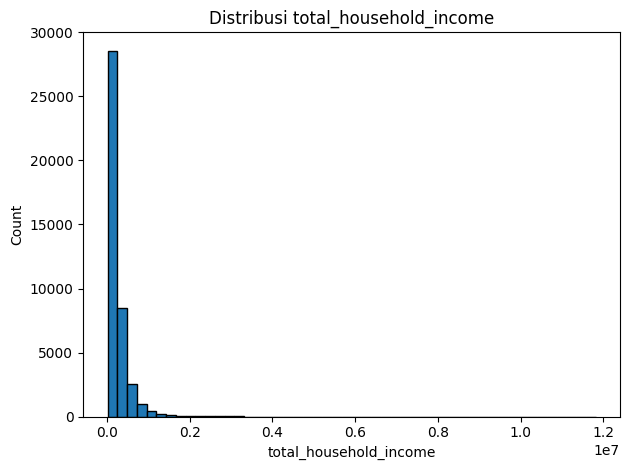

In [35]:
# 7.1 Histogram untuk kolom income terpilih
if primary_income_col is not None and primary_income_col in df.columns:
    plt.figure()
    pd.to_numeric(df[primary_income_col], errors="coerce").dropna().plot(kind="hist", bins=50, edgecolor="black")
    plt.title(f"Distribusi {primary_income_col}")
    plt.xlabel(primary_income_col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

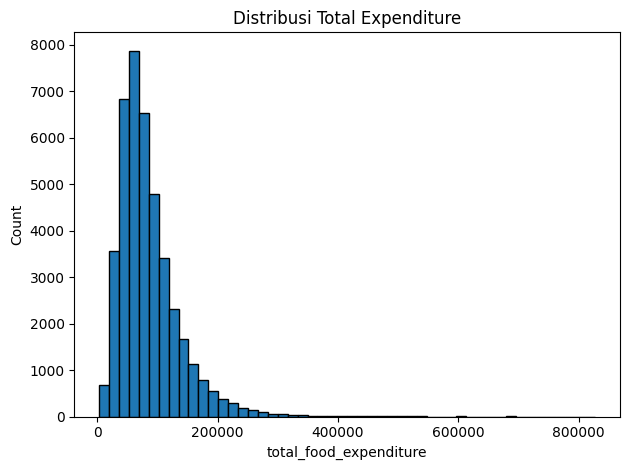

Statistik deskriptif Total Expenditure:
count    41,544.00
mean     85,099.16
std      51,637.95
min       2,947.00
25%      51,017.25
50%      72,985.50
75%     105,635.50
90%     148,255.20
95%     181,990.60
99%     263,676.09
max     827,565.00
Name: total_food_expenditure, dtype: float64


In [37]:
# 7.2 Histogram total pengeluaran

total_exp_series = pd.to_numeric(df[total_expenditure_col], errors="coerce")

plt.figure()
total_exp_series.dropna().plot(kind="hist", bins=50, edgecolor="black")
plt.title("Distribusi Total Expenditure")
plt.xlabel(total_expenditure_col)
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Ringkasan statistik tambahan
print("Statistik deskriptif Total Expenditure:")
print(total_exp_series.describe(percentiles=[.25, .5, .75, .9, .95, .99]))

## 8) Komposisi Pengeluaran per Kategori (Nominal)
Tujuan: menemukan kategori dengan kontribusi nominal terbesar.  
Metode: menghitung rata-rata nominal pada setiap kolom pengeluaran, kemudian menampilkan 10 kategori teratas.

In [42]:
exp_df = df[exp_cols].apply(pd.to_numeric, errors="coerce")

summary = pd.DataFrame({
    "mean": exp_df.mean(),
    "median": exp_df.median(),
    "std": exp_df.std(ddof=1),
    "min": exp_df.min(),
    "max": exp_df.max(),
    "p90": exp_df.quantile(0.90),
    "p95": exp_df.quantile(0.95),
    "p99": exp_df.quantile(0.99),
    "missing_cnt": exp_df.isna().sum(),
    "missing_pct": (exp_df.isna().mean() * 100).round(2)
}).sort_values("mean", ascending=False)

print("Ringkasan Statistik Kategori Pengeluaran (diurutkan menurut mean)")
display(summary.head(10))

Ringkasan Statistik Kategori Pengeluaran (diurutkan menurut mean)


,mean,median,std,min,max,p90,p95,p99,missing_cnt,missing_pct
total_food_expenditure,"85,099.16","72,985.50","51,637.95",2947,827565,"148,255.20","181,990.60","263,676.09",0,0.00
housing_and_water_expenditure,"38,375.47","22,992.00","53,111.68",1950,2188560,"80,520.00","114,210.00","221,256.78",0,0.00
bread_and_cereals_expenditure,"25,133.72","23,324.00","13,466.48",0,765864,"40,384.70","46,887.00","63,547.41",0,0.00
total_rice_expenditure,"18,195.83","16,620.00","11,727.22",0,758326,"31,481.10","36,939.70","50,204.56",0,0.00
restaurant_and_hotels_expenditure,"15,436.57","7,314.00","23,705.20",0,725296,"39,628.90","57,063.60","106,229.90",0,0.00
crop_farming_and_gardening_expenses,"13,816.86",0.00,"47,643.78",0,3729973,"45,112.80","78,204.55","164,896.67",0,0.00
miscellaneous_goods_and_services_expenditure,"12,522.07","6,804.00","17,547.03",0,553560,"28,816.20","41,795.10","82,152.84",0,0.00
transportation_expenditure,"11,806.34","6,036.00","19,351.21",0,834996,"27,492.00","41,026.20","86,352.84",0,0.00
meat_expenditure,"10,540.07","7,332.50","10,497.73",0,261566,"23,696.70","30,950.65","48,145.57",0,0.00
total_fish_and_marine_products_expenditure,"10,529.32","8,695.00","7,812.20",0,188208,"19,430.70","24,490.00","38,945.85",0,0.00


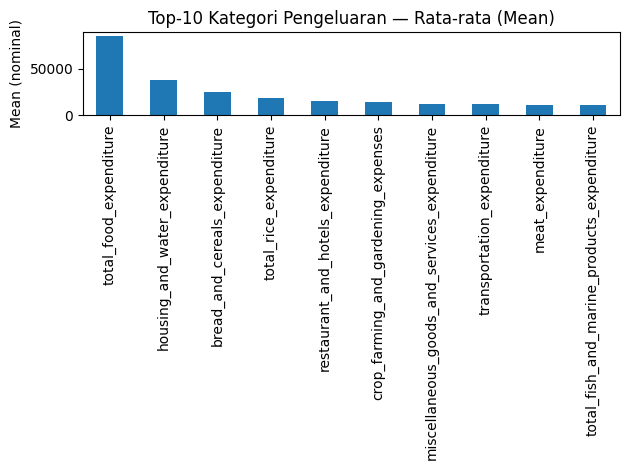

In [43]:
# Top-10 kategori berdasarkan mean
top10_mean = summary.sort_values("mean", ascending=False).head(10)["mean"]

plt.figure()
top10_mean.plot(kind="bar")
plt.title("Top-10 Kategori Pengeluaran — Rata-rata (Mean)")
plt.ylabel("Mean (nominal)")
plt.tight_layout()
plt.show()

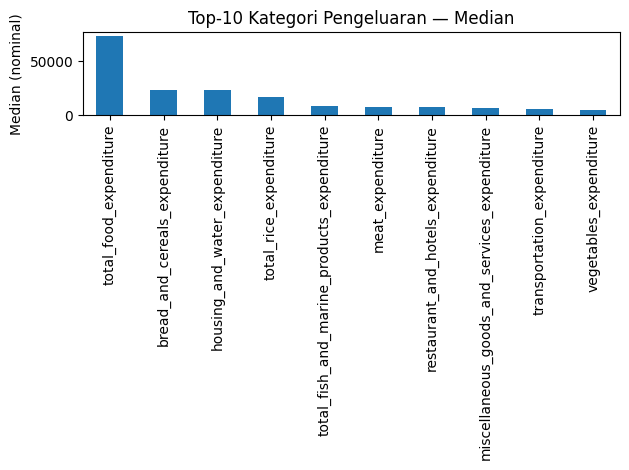

In [44]:
# Top-10 kategori berdasarkan median (lebih robust terhadap outlier)
top10_median = summary.sort_values("median", ascending=False).head(10)["median"]

plt.figure()
top10_median.plot(kind="bar")
plt.title("Top-10 Kategori Pengeluaran — Median")
plt.ylabel("Median (nominal)")
plt.tight_layout()
plt.show()

## 9) Hubungan Pendapatan vs Pengeluaran Untuk Makanan
Tujuan: memahami korelasi makro antara pendapatan dan pengeluaran.  
- Jika titik berada jauh di atas garis `y = x`, terdapat indikasi **overspending**.  
- Tingkat overspending dihitung dengan membandingkan estimasi total pengeluaran dengan pendapatan utama per baris (hitung sementara, tidak membuat kolom baru).

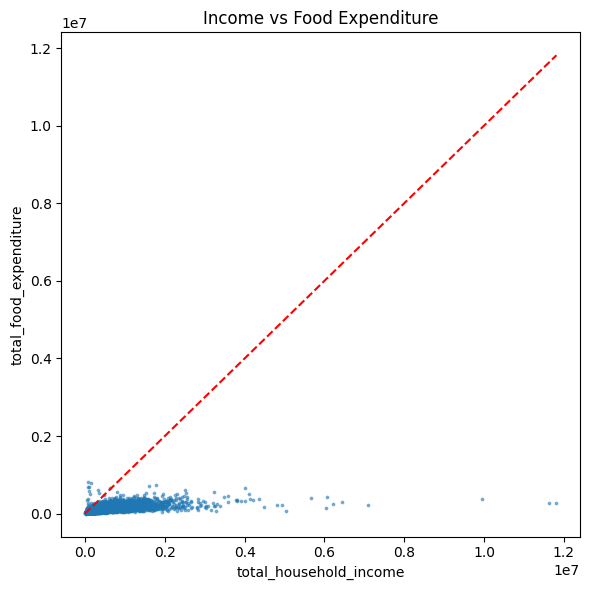

Persentase overspending (pengeluaran > pendapatan): 0.75%


In [46]:
income_s = pd.to_numeric(df[primary_income_col], errors="coerce")
spend_s = pd.to_numeric(df[total_expenditure_col], errors="coerce")

valid_mask = income_s.notna() & spend_s.notna()
x = income_s[valid_mask]
y = spend_s[valid_mask]

plt.figure(figsize=(6,6))
plt.scatter(x, y, s=3, alpha=0.5)
max_axis = max(x.max(), y.max())
plt.plot([0, max_axis], [0, max_axis], color="red", linestyle="--")  # garis y = x
plt.title("Income vs Food Expenditure")
plt.xlabel(primary_income_col)
plt.ylabel(total_expenditure_col)
plt.tight_layout()
plt.show()

overspend_rate = (y > x).mean() * 100
print(f"Persentase overspending (pengeluaran > pendapatan): {overspend_rate:.2f}%")

## 10) Perbedaan Pola Pengeluaran per Kuartil Pendapatan (Sementara)
Tujuan: memeriksa apakah proporsi kategori pengeluaran berubah seiring naiknya pendapatan (indikasi hukum Engel).  
Langkah:
- Membentuk kuartil pendapatan dari `primary_income_col` (sementara).  
- Menghitung **proporsi sementara** per kategori = `kategori / total pengeluaran` (jika total pengeluaran tersedia atau bisa dihitung).  
- Menampilkan rata-rata proporsi pada **bucket kategori** yang umum digunakan dalam budgeting: **Primer, Sekunder, Tersier**.

Catatan: perhitungan dilakukan secara **sementara** (tanpa menambah kolom ke `df`).

/tmp/ipython-input-410780296.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = share_frame[cols_exist].groupby(quartile_series).mean()
/tmp/ipython-input-410780296.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = share_frame[cols_exist].groupby(quartile_series).mean()
/tmp/ipython-input-410780296.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = share_frame[cols_exist].groupby(quartile_series)

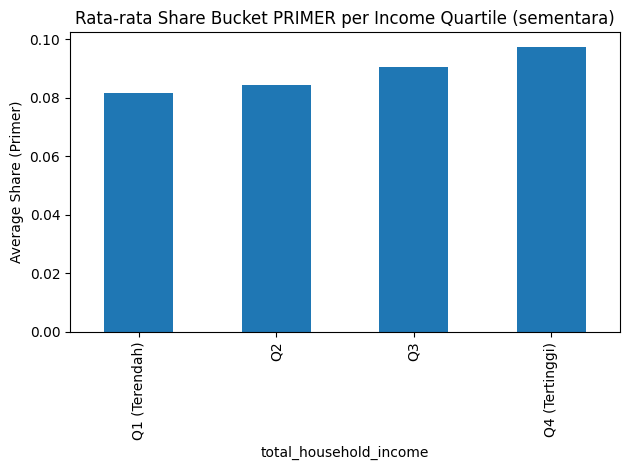

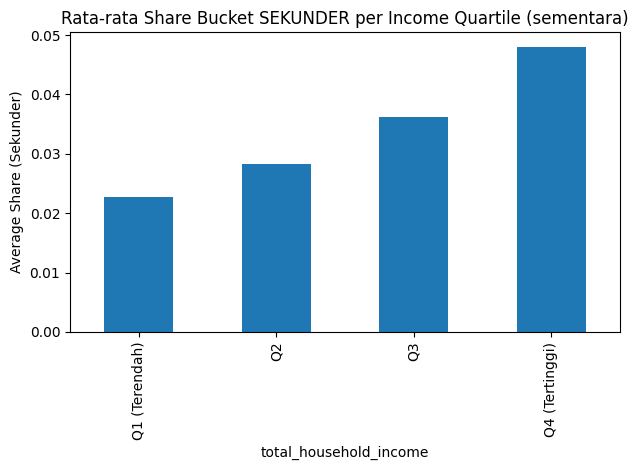

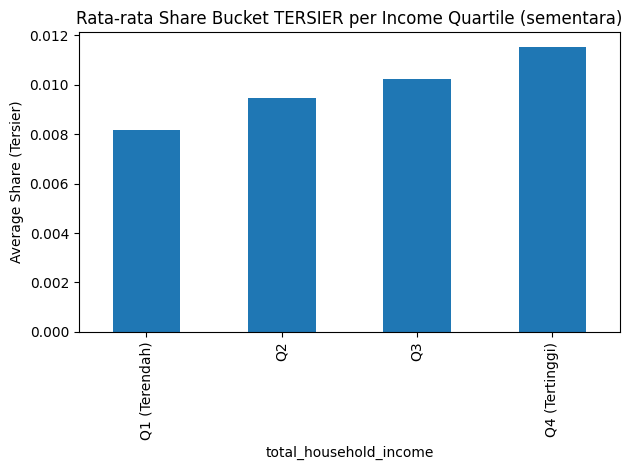

In [47]:
# Definisi bucket kategori (gunakan hanya yang ada di dataset)
primer = [
    "total_food_expenditure",
    "housing_and_water_expenditure",
    "transportation_expenditure",
    "communication_expenditure",
    "medical_care_expenditure",
    "education_expenditure",
]
sekunder = [
    "clothing_footwear_and_other_wear_expenditure",
    "restaurant_and_hotels_expenditure",
    "miscellaneous_goods_and_services_expenditure",
]
tersier = [
    "alcoholic_beverages_expenditure",
    "tobacco_expenditure",
    "special_occasions_expenditure",
]

def existing_columns(cols):
    return [c for c in cols if c in df.columns]

# Income quartiles (sementara)
income_s = pd.to_numeric(df[primary_income_col], errors="coerce")
valid_income = income_s.dropna()
if len(valid_income) >= 4:
    q_labels = ["Q1 (Terendah)", "Q2", "Q3", "Q4 (Tertinggi)"]
    income_quartile = pd.qcut(valid_income, q=4, labels=q_labels)
    quartile_aligned = income_quartile.reindex(df.index)

# Hitung proporsi sementara untuk setiap kategori pengeluaran yang tersedia
exp_df = df[[c for c in exp_cols if c in df.columns]].apply(pd.to_numeric, errors="coerce").fillna(0)
total_exp_tmp = exp_df.sum(axis=1)
with np.errstate(divide='ignore', invalid='ignore'):
    share_tmp = exp_df.div(total_exp_tmp.replace(0, np.nan), axis=0).fillna(0)

# Rata-rata share per bucket per kuartil
def average_bucket_share(share_frame, bucket_cols, quartile_series):
    cols_exist = [c for c in bucket_cols if c in share_frame.columns]
    if not cols_exist:
        return None
    grp = share_frame[cols_exist].groupby(quartile_series).mean()
    return grp.mean(axis=1)

avg_primer = average_bucket_share(share_tmp, existing_columns(primer), quartile_aligned)
avg_sekunder = average_bucket_share(share_tmp, existing_columns(sekunder), quartile_aligned)
avg_tersier = average_bucket_share(share_tmp, existing_columns(tersier), quartile_aligned)

plt.figure()
avg_primer.plot(kind="bar")
plt.title("Rata-rata Share Bucket PRIMER per Income Quartile (sementara)")
plt.ylabel("Average Share (Primer)")
plt.tight_layout()
plt.show()

plt.figure()
avg_sekunder.plot(kind="bar")
plt.title("Rata-rata Share Bucket SEKUNDER per Income Quartile (sementara)")
plt.ylabel("Average Share (Sekunder)")
plt.tight_layout()
plt.show()

plt.figure()
avg_tersier.plot(kind="bar")
plt.title("Rata-rata Share Bucket TERSIER per Income Quartile (sementara)")
plt.ylabel("Average Share (Tersier)")
plt.tight_layout()
plt.show()

## 11) Korelasi Antar Kategori Pengeluaran (Proporsi Sementara)
Tujuan: mengamati hubungan substitusi/komplementer antar kategori melalui korelasi proporsi (dihitung sementara).  
Langkah: membentuk matriks proporsi kategori (`kategori / total pengeluaran`) secara sementara, lalu menghitung korelasi.

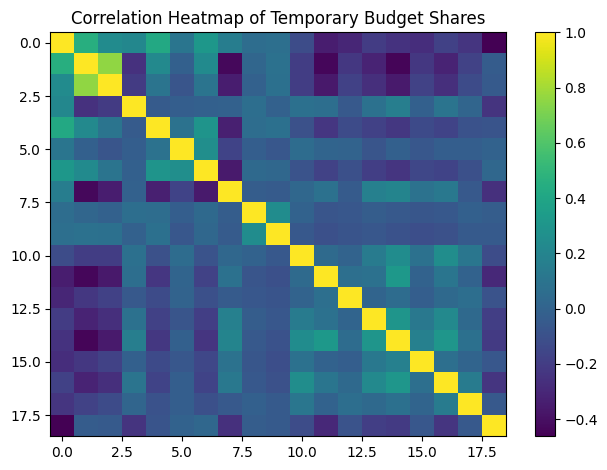

In [48]:
exp_df = df[exp_cols].apply(pd.to_numeric, errors="coerce").fillna(0)
total_exp_tmp = exp_df.sum(axis=1)
with np.errstate(divide='ignore', invalid='ignore'):
    share_tmp = exp_df.div(total_exp_tmp.replace(0, np.nan), axis=0).fillna(0)

corr = share_tmp.corr()
plt.figure()
plt.imshow(corr, aspect="auto", interpolation="nearest")
plt.title("Correlation Heatmap of Temporary Budget Shares")
plt.colorbar()
plt.tight_layout()
plt.show()